<a href="https://colab.research.google.com/github/NishaMDev/DeepLearning/blob/main/Assignment%232/DL_TensorFlow_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment#2 - Practicing Tensor Operations using TensorFlow**

 ***Author - Nisha Mohan Devadiga***


# Introduction to Tensors

In [103]:
import tensorflow as tf
import numpy as np

Tensors are multi-dimensional arrays with a uniform type (called a `dtype`).  You can see all supported `dtypes` at `tf.dtypes.DType`.

If you're familiar with [NumPy](https://numpy.org/devdocs/user/quickstart.html), tensors are (kind of) like `np.arrays`.

All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.


## Basics

Let's create some basic tensors.

Here is a "scalar" or "rank-0" tensor . A scalar contains a single value, and no "axes".

In [104]:
# This will be an int32 tensor by default; see "dtypes" below.
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


A "vector" or "rank-1" tensor is like a list of values. A vector has one axis:

In [105]:
# Let's make this a float tensor.
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


A "matrix" or "rank-2" tensor has two axes:

In [106]:
# If you want to be specific, you can set the dtype (see below) at creation time
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


<table>
<tr>
  <th>A scalar, shape: <code>[]</code></th>
  <th>A vector, shape: <code>[3]</code></th>
  <th>A matrix, shape: <code>[3, 2]</code></th>
</tr>
<tr>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/scalar.png?raw=1" alt="A scalar, the number 4" />
  </td>

  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/vector.png?raw=1" alt="The line with 3 sections, each one containing a number."/>
  </td>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/matrix.png?raw=1" alt="A 3x2 grid, with each cell containing a number.">
  </td>
</tr>
</table>


Tensors may have more axes; here is a tensor with three axes:

In [107]:
# There can be an arbitrary number of
# axes (sometimes called "dimensions")
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


There are many ways you might visualize a tensor with more than two axes.

<table>
<tr>
  <th colspan=3>A 3-axis tensor, shape: <code>[3, 2, 5]</code></th>
<tr>
<tr>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_numpy.png?raw=1"/>
  </td>
  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_front.png?raw=1"/>
  </td>

  <td>
   <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/3-axis_block.png?raw=1"/>
  </td>
</tr>

</table>

You can convert a tensor to a NumPy array either using `np.array` or the `tensor.numpy` method:

In [108]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

In [109]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

Tensors often contain floats and ints, but have many other types, including:

* complex numbers
* strings

The base `tf.Tensor` class requires tensors to be "rectangular"---that is, along each axis, every element is the same size.  However, there are specialized types of tensors that can handle different shapes:

* Ragged tensors (see [RaggedTensor](#ragged_tensors) below)
* Sparse tensors (see [SparseTensor](#sparse_tensors) below)

You can do basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [110]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [111]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors are used in all kinds of operations (ops).

In [112]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


In [113]:
print(tf.add(1, 2))
print(tf.add([1, 2], [3, 4]))
print(tf.square(5))
print(tf.reduce_sum([1, 2, 3]))

# Operator overloading is also supported
print(tf.square(2) + tf.square(3))

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


## About shapes

Tensors have shapes.  Some vocabulary:

* **Shape**: The length (number of elements) of each of the axes of a tensor.
* **Rank**: Number of tensor axes.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
* **Axis** or **Dimension**: A particular dimension of a tensor.
* **Size**: The total number of items in the tensor, the product shape vector.


Note: Although you may see reference to a "tensor of two dimensions", a rank-2 tensor does not usually describe a 2D space.

Tensors and `tf.TensorShape` objects have convenient properties for accessing these:

In [114]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

<table>
<tr>
  <th colspan=2>A rank-4 tensor, shape: <code>[3, 2, 4, 5]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape.png?raw=1" alt="A tensor shape is like a vector.">
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/4-axis_block.png?raw=1" alt="A 4-axis tensor">
  </td>
  </tr>
</table>


In [115]:
rank_4_tensor

<tf.Tensor: shape=(3, 2, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [116]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along axis 1 of tensor:", rank_4_tensor.shape[1])
print("Elements along axis 2 of tensor:", rank_4_tensor.shape[2])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along axis 1 of tensor: 2
Elements along axis 2 of tensor: 4
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.

<table>
<tr>
<th>Typical axis order</th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/shape2.png?raw=1" alt="Keep track of what each axis is. A 4-axis tensor might be: Batch, Width, Height, Features">
  </td>
</tr>
</table>

In [117]:
x = tf.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


## Indexing

### Single-axis indexing

TensorFlow follows standard Python indexing rules, similar to [indexing a list or a string in Python](https://docs.python.org/3/tutorial/introduction.html#strings), and the basic rules for NumPy indexing.

* indexes start at `0`
* negative indices count backwards from the end
* colons, `:`, are used for slices: `start:stop:step`


In [118]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the axis:

In [119]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


Indexing with a `:` slice keeps the axis:

In [120]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### Multi-axis indexing

Higher rank tensors are indexed by passing multiple indices.

The exact same rules as in the single-axis case apply to each axis independently.

In [121]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Passing an integer for each index, the result is a scalar.

In [122]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


You can index using any combination of integers and slices:

In [123]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [124]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


<table>
<tr>
<th colspan=2>Selecting the last feature across all locations in each example in the batch </th>
</tr>
<tr>
    <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/index1.png?raw=1" alt="A 3x2x5 tensor with all the values at the index-4 of the last axis selected.">
  </td>
      <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/index2.png?raw=1" alt="The selected values packed into a 2-axis tensor.">
  </td>
</tr>
</table>

Read the [tensor slicing guide](https://tensorflow.org/guide/tensor_slicing) to learn how you can apply indexing to manipulate individual elements in your tensors.

## Manipulating Shapes

Reshaping a tensor is of great utility. 


In [125]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [126]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The `tf.reshape` operation is fast and cheap as the underlying data does not need to be duplicated.

In [127]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])

In [128]:
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

In [129]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If you flatten a tensor you can see what order it is laid out in memory.

In [130]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable use of `tf.reshape` is to combine or split adjacent axes (or add/remove `1`s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [131]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


<table>
<th colspan=3>
Some good reshapes.
</th>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-before.png?raw=1" alt="A 3x2x5 tensor">
  </td>
  <td>
  <img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-good1.png?raw=1" alt="The same data reshaped to (3x2)x5">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-good2.png?raw=1" alt="The same data reshaped to 3x(2x5)">
  </td>
</tr>
</table>


Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if you do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work; you need `tf.transpose` for that. 


In [132]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


<table>
<th colspan=3>
Some bad reshapes.
</th>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad.png?raw=1" alt="You can't reorder axes, use tf.transpose for that">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad4.png?raw=1" alt="Anything that mixes the slices of data together is probably wrong.">
  </td>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/reshape-bad2.png?raw=1" alt="The new shape must fit exactly.">
  </td>
</tr>
</table>

You may run across not-fully-specified shapes. Either the shape contains a `None` (an axis-length is unknown) or the whole shape is `None` (the rank of the tensor is unknown).

Except for [tf.RaggedTensor](#ragged_tensors), such shapes will only occur in the context of TensorFlow's symbolic, graph-building  APIs:

* [tf.function](function.ipynb) 
* The [keras functional API](https://www.tensorflow.org/guide/keras/functional).


## More on `DTypes`

To inspect a `tf.Tensor`'s data type use the `Tensor.dtype` property.

When creating a `tf.Tensor` from a Python object you may optionally specify the datatype.

If you don't, TensorFlow chooses a datatype that can represent your data. TensorFlow converts Python integers to `tf.int32` and Python floating point numbers to `tf.float32`. Otherwise TensorFlow uses the same rules NumPy uses when converting to arrays.

You can cast from type to type.

In [133]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## Broadcasting

Broadcasting is a concept borrowed from the [equivalent feature in NumPy](https://numpy.org/doc/stable/user/basics.html).  In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar.  In that case, the scalar is broadcast to be the same shape as the other argument. 

In [134]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Likewise, axes with length 1 can be stretched out to match the other arguments.  Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is `[4]`.

In [135]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


<table>
<tr>
  <th>A broadcasted add: a <code>[3, 1]</code> times a <code>[1, 4]</code> gives a <code>[3,4]</code> </th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/broadcasting.png?raw=1" alt="Adding a 3x1 matrix to a 4x1 matrix results in a 3x4 matrix">
  </td>
</tr>
</table>


Here is the same operation without broadcasting:

In [136]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


Most of the time, broadcasting is both time and space efficient, as the broadcast operation never materializes the expanded tensors in memory.  

You see what broadcasting looks like using `tf.broadcast_to`.

In [137]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


Unlike a mathematical op, for example, `broadcast_to` does nothing special to save memory.  Here, you are materializing the tensor.

It can get even more complicated.  [This section](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html) of Jake VanderPlas's book _Python Data Science Handbook_ shows more broadcasting tricks (again in NumPy).

## tf.convert_to_tensor

Most ops, like `tf.matmul` and `tf.reshape` take arguments of class `tf.Tensor`.  However, you'll notice in the above case, Python objects shaped like tensors are accepted.

Most, but not all, ops call `convert_to_tensor` on non-tensor arguments.  There is a registry of conversions, and most object classes like NumPy's `ndarray`, `TensorShape`, Python lists, and `tf.Variable` will all convert automatically.

See `tf.register_tensor_conversion_function` for more details, and if you have your own type you'd like to automatically convert to a tensor.

## Ragged Tensors

A tensor with variable numbers of elements along some axis is called "ragged". Use `tf.ragged.RaggedTensor` for ragged data.

For example, This cannot be represented as a regular tensor:

<table>
<tr>
  <th>A `tf.RaggedTensor`, shape: <code>[4, None]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/ragged.png?raw=1" alt="A 2-axis ragged tensor, each row can have a different length.">
  </td>
</tr>
</table>

In [138]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [139]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


Instead create a `tf.RaggedTensor` using `tf.ragged.constant`:

In [140]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


The shape of a `tf.RaggedTensor` will contain some axes with unknown lengths:

In [141]:
print(ragged_tensor.shape)

(4, None)


## String tensors

`tf.string` is a `dtype`, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor. See `tf.strings` for functions to manipulate them.

Here is a scalar string tensor:

In [142]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


And a vector of strings:

<table>
<tr>
  <th>A vector of strings, shape: <code>[3,]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/strings.png?raw=1" alt="The string length is not one of the tensor's axes.">
  </td>
</tr>
</table>

In [143]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In the above printout the `b` prefix indicates that `tf.string` dtype is not a unicode string, but a byte-string. See the [Unicode Tutorial](https://www.tensorflow.org/tutorials/load_data/unicode) for more about working with unicode text in TensorFlow.

If you pass unicode characters they are utf-8 encoded.

In [144]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

Some basic functions with strings can be found in `tf.strings`, including `tf.strings.split`.

In [145]:
# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [146]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


<table>
<tr>
  <th>Three strings split, shape: <code>[3, None]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/string-split.png?raw=1" alt="Splitting multiple strings returns a tf.RaggedTensor">
  </td>
</tr>
</table>

And `tf.string.to_number`:

In [147]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


Although you can't use `tf.cast` to turn a string tensor into numbers, you can convert it into bytes, and then into numbers.

In [148]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [149]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


The `tf.string` dtype is used for all raw bytes data in TensorFlow. The `tf.io` module contains functions for converting data to and from bytes, including decoding images and parsing csv.

## Sparse tensors

Sometimes, your data is sparse, like a very wide embedding space.  TensorFlow supports `tf.sparse.SparseTensor` and related operations to store sparse data efficiently.

<table>
<tr>
  <th>A `tf.SparseTensor`, shape: <code>[3, 4]</code></th>
</tr>
<tr>
  <td>
<img src="https://github.com/tensorflow/docs/blob/master/site/en/guide/images/tensor/sparse.png?raw=1" alt="An 3x4 grid, with values in only two of the cells.">
  </td>
</tr>
</table>

In [150]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


### NumPy Compatibility

Converting between a TensorFlow `tf.Tensor`s and a NumPy `ndarray` is easy:

* TensorFlow operations automatically convert NumPy ndarrays to Tensors.
* NumPy operations automatically convert Tensors to NumPy ndarrays.

Tensors are explicitly converted to NumPy ndarrays using their `.numpy()` method. These conversions are typically cheap since the array and `tf.Tensor` share the underlying memory representation, if possible. However, sharing the underlying representation isn't always possible since the `tf.Tensor` may be hosted in GPU memory while NumPy arrays are always backed by host memory, and the conversion involves a copy from GPU to host memory.

In [151]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


## GPU acceleration

Many TensorFlow operations are accelerated using the GPU for computation. Without any annotations, TensorFlow automatically decides whether to use the GPU or CPU for an operation—copying the tensor between CPU and GPU memory, if necessary. Tensors produced by an operation are typically backed by the memory of the device on which the operation executed, for example:

In [152]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[]
Is the Tensor on GPU #0:  
False


### Device Names

The `Tensor.device` property provides a fully qualified string name of the device hosting the contents of the tensor. This name encodes many details, such as an identifier of the network address of the host on which this program is executing and the device within that host. This is required for distributed execution of a TensorFlow program. The string ends with `GPU:<N>` if the tensor is placed on the `N`-th GPU on the host.

### Explicit Device Placement

In TensorFlow, *placement* refers to how individual operations are assigned (placed on) a device for execution. As mentioned, when there is no explicit guidance provided, TensorFlow automatically decides which device to execute an operation and copies tensors to that device, if needed. However, TensorFlow operations can be explicitly placed on specific devices using the `tf.device` context manager, for example:

In [153]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 378.62ms


# EINSUM Practice 

**Matrix multiplication**

In [154]:
m0 = tf.random.normal(shape=[2, 3])
m1 = tf.random.normal(shape=[3, 5])
e = tf.einsum('ij,jk->ik', m0, m1)  # output[i,k] = sum_j m0[i,j] * m1[j, k]
print(e.shape)
print(e)

(2, 5)
tf.Tensor(
[[-0.6434259  -0.50193065  2.2820194   2.0206609  -0.20959798]
 [ 1.8604236   0.55865955 -3.0179021  -2.3640814  -0.22172397]], shape=(2, 5), dtype=float32)


**Repeated indices are summed if the output indices are not specified.**

In [155]:
e = tf.einsum('ij,jk', m0, m1)  # output[i,k] = sum_j m0[i,j] * m1[j, k]
print(e.shape)
print(e)

(2, 5)
tf.Tensor(
[[-0.6434259  -0.50193065  2.2820194   2.0206609  -0.20959798]
 [ 1.8604236   0.55865955 -3.0179021  -2.3640814  -0.22172397]], shape=(2, 5), dtype=float32)


**Dot product**

In [156]:
u = tf.random.normal(shape=[5])
v = tf.random.normal(shape=[5])
e = tf.einsum('i,i->', u, v)  # output = sum_i u[i]*v[i]
print(e.shape)
print(e)

()
tf.Tensor(2.4288075, shape=(), dtype=float32)


**Outer product**

In [157]:
u = tf.random.normal(shape=[3])
v = tf.random.normal(shape=[5])
e = tf.einsum('i,j->ij', u, v)  # output[i,j] = u[i]*v[j]
print(e.shape)
print(e)

(3, 5)
tf.Tensor(
[[ 0.511492   -0.38717404  0.04258029  0.3581535   0.4748446 ]
 [-0.88767767  0.67192787 -0.07389671 -0.6215636  -0.8240773 ]
 [ 3.6423616  -2.7570865   0.3032165   2.5504296   3.3813934 ]], shape=(3, 5), dtype=float32)


**Transpose**

In [158]:
m = tf.ones(2,3)
e = tf.einsum('ij->ji', m0)  # output[j,i] = m0[i,j]
print(e.shape)
print(e)

(3, 2)
tf.Tensor(
[[ 1.1457716  -1.6851505 ]
 [ 0.0419821   0.47021544]
 [-0.09928074 -0.06002826]], shape=(3, 2), dtype=float32)


**Diag**

In [159]:
m = tf.reshape(tf.range(9), [3,3])
diag = tf.einsum('ii->i', m)
print(diag.shape)
print(e)

(3,)
tf.Tensor(
[[ 1.1457716  -1.6851505 ]
 [ 0.0419821   0.47021544]
 [-0.09928074 -0.06002826]], shape=(3, 2), dtype=float32)


**Trace**

In [160]:
# Repeated indices are summed.
trace = tf.einsum('ii', m)  # output[j,i] = trace(m) = sum_i m[i, i]
assert trace == sum(diag)
print(trace.shape)
print(trace)

()
tf.Tensor(12, shape=(), dtype=int32)


**Batch matrix multiplication**

In [161]:
s = tf.random.normal(shape=[7,5,3])
t = tf.random.normal(shape=[7,3,2])
e = tf.einsum('bij,bjk->bik', s, t)
# output[a,i,k] = sum_j s[a,i,j] * t[a, j, k]
print(e.shape)


(7, 5, 2)


This method does not support broadcasting on named-axes. All axes with matching labels should have the same length. If you have length-1 axes, use tf.squeseze or tf.reshape to eliminate them.

To write code that is agnostic to the number of indices in the input use an ellipsis. The ellipsis is a placeholder for "whatever other indices fit here".

For example, to perform a NumPy-style broadcasting-batch-matrix multiplication where the matrix multiply acts on the last two axes of the input, use:

In [162]:
s = tf.random.normal(shape=[11, 7, 5, 3])
t = tf.random.normal(shape=[11, 7, 3, 2])
e =  tf.einsum('...ij,...jk->...ik', s, t)
print(e.shape)


(11, 7, 5, 2)


In [163]:
s = tf.random.normal(shape=[11, 1, 5, 3])
t = tf.random.normal(shape=[1, 7, 3, 2])
e =  tf.einsum('...ij,...jk->...ik', s, t)
print(e.shape)


(11, 7, 5, 2)


**A sparse representation of a set of tensor slices at given indices.**

In [164]:
v = tf.Variable([[0.,1, 2], [2, 3, 4], [4, 5, 6], [6, 7, 8]])
with tf.GradientTape() as tape:
  r = tf.gather(v, [1,3])
index_slices = tape.gradient(r,v)
index_slices

index_slices.indices.numpy()

index_slices.values.numpy()



array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [165]:
v = tf.Variable(1., shape=tf.TensorShape(None))
v.assign([[1.]])


<tf.Variable 'UnreadVariable' shape=<unknown> dtype=float32, numpy=array([[1.]], dtype=float32)>

In [166]:
w = tf.Variable([[1.], [2.]])
x = tf.constant([[3., 4.]])
tf.matmul(w, x)



tf.sigmoid(w + x)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.98201376, 0.9933071 ],
       [0.9933071 , 0.99752736]], dtype=float32)>

In [167]:
with tf.GradientTape(persistent=True) as tape:
  trainable = tf.Variable(1.)
  non_trainable = tf.Variable(2., trainable=False)
  x1 = trainable * 2.
  x2 = non_trainable * 3.
tape.gradient(x1, trainable)

assert tape.gradient(x2, non_trainable) is None  # Unwatched

In [168]:
m = tf.Module()
m.v = tf.Variable([1.])
m.trainable_variables

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.], dtype=float32)>,)

In [169]:
v = tf.Variable(0.)
read_and_decrement = tf.function(lambda: v.assign_sub(0.1))
read_and_decrement()

read_and_decrement()


<tf.Tensor: shape=(), dtype=float32, numpy=-0.2>

In [170]:
class M(tf.Module):
  @tf.function
  def __call__(self, x):
    if not hasattr(self, "v"):  # Or set self.v to None in __init__
      self.v = tf.Variable(x)
    return self.v * x
m = M()
print(m(2.))

print(m(3.))

print(m.v)


tf.Tensor(4.0, shape=(), dtype=float32)
tf.Tensor(6.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0>


**Creates a constant tensor from a tensor-like object.**

In [171]:
# Constant 1-D Tensor from a python list.
tf.constant([1, 2, 3, 4, 5, 6])


<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6], dtype=int32)>

In [172]:
# Or a numpy array
a = np.array([[1, 2, 3], [4, 5, 6]])
tf.constant(a)


<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [173]:
tf.constant([1, 2, 3, 4, 5, 6], dtype=tf.float64)



<tf.Tensor: shape=(6,), dtype=float64, numpy=array([1., 2., 3., 4., 5., 6.])>

In [174]:
tf.constant(0, shape=(2, 3))


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 0, 0],
       [0, 0, 0]], dtype=int32)>

In [175]:
tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

**Creates a tensor filled with a scalar value.**

In [176]:
tf.fill([2, 3], 9)


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[9, 9, 9],
       [9, 9, 9]], dtype=int32)>

**Construct an identity matrix, or a batch of matrices.**

In [177]:
# Construct one identity matrix.
tf.eye(2)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.]], dtype=float32)>

In [178]:
# Construct a batch of 3 identity matrices, each 2 x 2.
# batch_identity[i, :, :] is a 2 x 2 identity matrix, i = 0, 1, 2.
batch_identity = tf.eye(2, batch_shape=[3])

# Construct one 2 x 3 "identity" matrix
tf.eye(2, num_columns=3)


<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.]], dtype=float32)>

**Return a Tensor with the same shape and contents as input.**

In [179]:
a = tf.constant([0.78])
a_identity = tf.identity(a)
a.numpy()

array([0.78], dtype=float32)

In [180]:
a_identity.numpy()

array([0.78], dtype=float32)

**Returns a one-hot tensor.**

In [181]:
indices = [0, 1, 2]
depth = 3
tf.one_hot(indices, depth)  # output: [3 x 3]
# [[1., 0., 0.],
#  [0., 1., 0.],
#  [0., 0., 1.]]


<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [182]:

indices = [0, 2, -1, 1]
depth = 3
tf.one_hot(indices, depth,
           on_value=5.0, off_value=0.0,
           axis=-1)  # output: [4 x 3]
# [[5.0, 0.0, 0.0],  # one_hot(0)
#  [0.0, 0.0, 5.0],  # one_hot(2)
#  [0.0, 0.0, 0.0],  # one_hot(-1)
#  [0.0, 5.0, 0.0]]  # one_hot(1)



<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[5., 0., 0.],
       [0., 0., 5.],
       [0., 0., 0.],
       [0., 5., 0.]], dtype=float32)>

In [183]:
indices = [[0, 2], [1, -1]]
depth = 3
tf.one_hot(indices, depth,
           on_value=1.0, off_value=0.0,
           axis=-1)  # output: [2 x 2 x 3]
# [[[1.0, 0.0, 0.0],   # one_hot(0)
#   [0.0, 0.0, 1.0]],  # one_hot(2)
#  [[0.0, 1.0, 0.0],   # one_hot(1)
#   [0.0, 0.0, 0.0]]]  # one_hot(-1)


<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
array([[[1., 0., 0.],
        [0., 0., 1.]],

       [[0., 1., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [184]:

indices = tf.ragged.constant([[0, 1], [2]])
depth = 3
tf.one_hot(indices, depth)  # output: [2 x None x 3]
# [[[1., 0., 0.],
#   [0., 1., 0.]],
#  [[0., 0., 1.]]]

<tf.RaggedTensor [[[1.0, 0.0, 0.0],
  [0.0, 1.0, 0.0]], [[0.0, 0.0, 1.0]]]>

**Splits a tensor value into a list of sub tensors.**

In [185]:
x = tf.Variable(tf.random.uniform([5, 30], -1, 1))

In [186]:
# Split `x` into 3 tensors along dimension 1
s0, s1, s2 = tf.split(x, num_or_size_splits=3, axis=1)
tf.shape(s0).numpy()

array([ 5, 10], dtype=int32)

In [187]:
# Split `x` into 3 tensors with sizes [4, 15, 11] along dimension 1
split0, split1, split2 = tf.split(x, [4, 15, 11], 1)
tf.shape(split0).numpy()

array([5, 4], dtype=int32)

In [188]:
tf.shape(split1).numpy()


array([ 5, 15], dtype=int32)

In [189]:
tf.shape(split2).numpy()

array([ 5, 11], dtype=int32)

## Datasets

This section uses the [`tf.data.Dataset` API](https://www.tensorflow.org/guide/datasets) to build a pipeline for feeding data to your model. The `tf.data.Dataset` API is used to build performant, complex input pipelines from simple, re-usable pieces that will feed your model's training or evaluation loops.

### Create a source `Dataset`

Create a *source* dataset using one of the factory functions like [`Dataset.from_tensors`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensors), [`Dataset.from_tensor_slices`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices), or using objects that read from files like [`TextLineDataset`](https://www.tensorflow.org/api_docs/python/tf/data/TextLineDataset) or [`TFRecordDataset`](https://www.tensorflow.org/api_docs/python/tf/data/TFRecordDataset). See the [TensorFlow Dataset guide](https://www.tensorflow.org/guide/datasets#reading_input_data) for more information.

In [190]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Create a CSV file
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
  f.write("""Line 1
Line 2
Line 3
  """)

ds_file = tf.data.TextLineDataset(filename)

### Apply transformations

Use the transformations functions like [`map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map), [`batch`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch), and [`shuffle`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) to apply transformations to dataset records.

In [191]:
ds_tensors = ds_tensors.map(tf.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

### Iterate

`tf.data.Dataset` objects support iteration to loop over records:

In [192]:
print('Elements of ds_tensors:')
for x in ds_tensors:
  print(x)

print('\nElements in ds_file:')
for x in ds_file:
  print(x)

Elements of ds_tensors:
tf.Tensor([4 9], shape=(2,), dtype=int32)
tf.Tensor([ 1 16], shape=(2,), dtype=int32)
tf.Tensor([25 36], shape=(2,), dtype=int32)

Elements in ds_file:
tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


# Custom layers

Layers: common sets of useful operations.

Most of the time when writing code for machine learning models you want to operate at a higher level of abstraction than individual operations and manipulation of individual variables.

Many machine learning models are expressible as the composition and stacking of relatively simple layers, and TensorFlow provides both a set of many common layers as a well as easy ways for you to write your own application-specific layers either from scratch or as the composition of existing layers.

TensorFlow includes the full Keras API in the tf.keras package, and the Keras layers are very useful when building your own models.

In [193]:
# In the tf.keras.layers package, layers are objects. To construct a layer,
# simply construct the object. Most layers take as a first argument the number
# of output dimensions / channels.

layer = tf.keras.layers.Dense(100)

# The number of input dimensions is often unnecessary, as it can be inferred
# the first time the layer is used, but it can be provided if you want to
# specify it manually, which is useful in some complex models.

layer = tf.keras.layers.Dense(10, input_shape=(None, 5))

The full list of pre-existing layers can be seen in the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers). It includes Dense (a fully-connected layer), Conv2D, LSTM, BatchNormalization, Dropout, and many others.

In [194]:
# To use a layer, simply call it.
layer(tf.zeros([10, 5]))

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [195]:
# Layers have many useful methods. For example, you can inspect all variables
# in a layer using `layer.variables` and trainable variables using
# `layer.trainable_variables`. In this case a fully-connected layer
# will have variables for weights and biases.
layer.variables

[<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.42354032,  0.45966822, -0.44538817, -0.6263186 ,  0.3222925 ,
          0.33592653, -0.03506178,  0.54150933, -0.19499722, -0.1422073 ],
        [ 0.1549434 ,  0.25131452, -0.26479465, -0.06704777,  0.41077095,
          0.5855406 , -0.6251343 ,  0.18147248, -0.26002803, -0.18952069],
        [-0.6042465 , -0.13616079,  0.39341885,  0.37649363, -0.51391506,
          0.26393938, -0.22186679,  0.29231727,  0.56789094, -0.02471131],
        [ 0.14254987,  0.6211733 , -0.07667309,  0.43311065, -0.27402383,
          0.5729709 ,  0.44590384, -0.02446717,  0.5999872 ,  0.33430856],
        [-0.03009164,  0.07878387, -0.5632344 ,  0.07416129,  0.22588229,
          0.04536957,  0.02882075,  0.43549198, -0.5576246 ,  0.34576768]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [196]:
# The variables are also accessible through nice accessors
layer.kernel, layer.bias

(<tf.Variable 'dense_1/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.42354032,  0.45966822, -0.44538817, -0.6263186 ,  0.3222925 ,
          0.33592653, -0.03506178,  0.54150933, -0.19499722, -0.1422073 ],
        [ 0.1549434 ,  0.25131452, -0.26479465, -0.06704777,  0.41077095,
          0.5855406 , -0.6251343 ,  0.18147248, -0.26002803, -0.18952069],
        [-0.6042465 , -0.13616079,  0.39341885,  0.37649363, -0.51391506,
          0.26393938, -0.22186679,  0.29231727,  0.56789094, -0.02471131],
        [ 0.14254987,  0.6211733 , -0.07667309,  0.43311065, -0.27402383,
          0.5729709 ,  0.44590384, -0.02446717,  0.5999872 ,  0.33430856],
        [-0.03009164,  0.07878387, -0.5632344 ,  0.07416129,  0.22588229,
          0.04536957,  0.02882075,  0.43549198, -0.5576246 ,  0.34576768]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

**Implementing custom layers**


The best way to implement your own layer is extending the tf.keras.Layer class and implementing:

1.   __init__ , where you can do all input-independent initialization
2.   **build**, where you know the shapes of the input tensors and can do the rest of the initialization
3.   **call**, where you do the forward computation

Note that you don't have to wait until build is called to create your variables, you can also create them in __init__. However, the advantage of creating them in build is that it enables late variable creation based on the shape of the inputs the layer will operate on. On the other hand, creating variables in __init__ would mean that shapes required to create the variables will need to be explicitly specified.

In [197]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs

  def build(self, input_shape):
    self.kernel = self.add_weight("kernel",
                                  shape=[int(input_shape[-1]),
                                         self.num_outputs])

  def call(self, inputs):
    return tf.matmul(inputs, self.kernel)

layer = MyDenseLayer(10)

In [198]:
_ = layer(tf.zeros([10, 5])) # Calling the layer `.builds` it.

In [199]:
print([var.name for var in layer.trainable_variables])

['my_dense_layer/kernel:0']


#TensorFlow 2 quickstart for beginners

In [200]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


**Load a dataset**

Load and prepare the MNIST dataset. Convert the sample data from integers to floating-point numbers:

In [201]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


**Build a machine learning model**
Build a tf.keras.Sequential model by stacking layers.

In [202]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example, the model returns a vector of logits or log-odds scores, one for each class.

In [203]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.26035628,  0.3681633 ,  0.4502015 , -0.7976475 , -0.07349447,
        -0.32750463,  0.00950411, -0.24778095,  0.15284045, -0.31129664]],
      dtype=float32)

The tf.nn.softmax function converts these logits to probabilities for each class:

In [204]:
tf.nn.softmax(predictions).numpy()

array([[0.08052036, 0.15096223, 0.1638691 , 0.04705038, 0.09706414,
        0.07529109, 0.10546409, 0.08153933, 0.12171799, 0.07652134]],
      dtype=float32)

Define a loss function for training using losses.SparseCategoricalCrossentropy, which takes a vector of logits and a True index and returns a scalar loss for each example.

In [205]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.

In [206]:
loss_fn(y_train[:1], predictions).numpy()

2.5863934

Before you start training, configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [207]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

**Train and evaluate your model**

Use the Model.fit method to adjust your model parameters and minimize the loss:

In [208]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2981 - accuracy: 0.9134
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1433 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1084 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0902 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0750 - accuracy: 0.9763


The Model.evaluate method checks the models performance, usually on a "Validation-set" or "Test-set".

In [209]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0750 - accuracy: 0.9769 - 560ms/epoch - 2ms/step


[0.07499735057353973, 0.9768999814987183]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the TensorFlow tutorials.

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [210]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])


probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.81624333e-08, 3.70591380e-08, 2.25995391e-05, 5.57172352e-05,
        2.57792121e-10, 4.69418808e-07, 4.29961492e-12, 9.99917269e-01,
        4.69386151e-07, 3.52354346e-06],
       [2.66640399e-08, 4.97840256e-06, 9.99989510e-01, 3.46789966e-06,
        4.76040689e-17, 1.98329940e-06, 2.04687178e-09, 4.53942024e-15,
        7.88174432e-08, 1.36685097e-13],
       [2.96290949e-07, 9.99658942e-01, 4.90914790e-05, 7.73960778e-07,
        1.79825111e-05, 4.86699992e-06, 3.30487928e-05, 1.38775780e-04,
        9.60801626e-05, 3.82803655e-08],
       [9.99941349e-01, 8.02345035e-09, 1.37105990e-05, 5.14678504e-07,
        3.59043320e-08, 5.06048650e-07, 3.88448243e-05, 5.59208615e-07,
        1.27603235e-08, 4.51213054e-06],
       [7.80337018e-07, 2.03960937e-08, 1.47102792e-05, 3.11117816e-08,
        9.96828854e-01, 3.86615454e-07, 6.52673225e-06, 2.58974993e-04,
        2.61383411e-05, 2.86344718e-03]], dtype=float32)>

**Conclusion:**
You have trained a machine learning model using a prebuilt dataset using the Keras API.

# Basic classification: Classify images of clothing

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. 

This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

In [211]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


**Import the Fashion MNIST dataset**
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

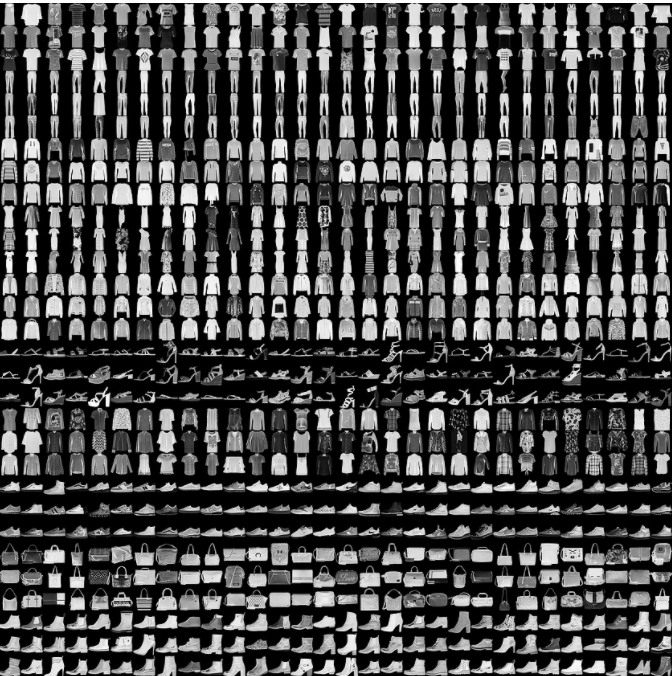

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [212]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


**Loading the dataset returns four NumPy arrays:**

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Label	Class

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [213]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [214]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [215]:
len(train_labels)

60000

Each label is an integer between 0 and 9

In [216]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [217]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [218]:
len(test_labels)

10000

# Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

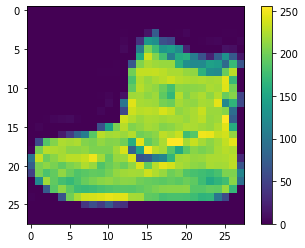

In [219]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [220]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

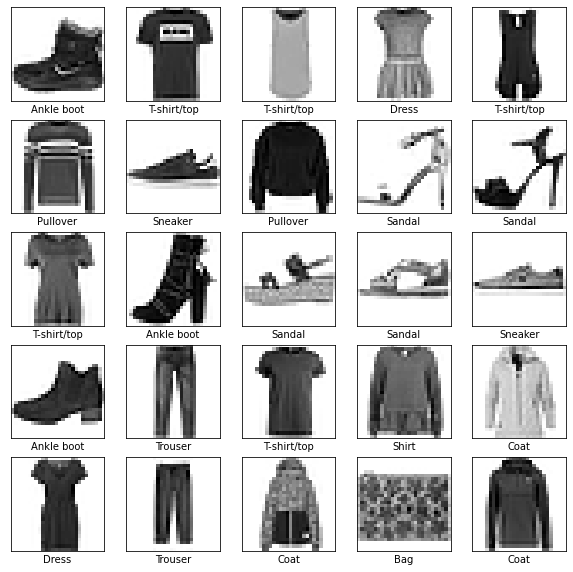

In [221]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

**Set up the layers**

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [222]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

**Compile the model**

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

*Loss function —* This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.

*Optimizer —*This is how the model is updated based on the data it sees and its loss function.

*Metrics —*Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [223]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.

The model learns to associate images and labels.

You ask the model to make predictions about a test set—in this example, the test_images array.

Verify that the predictions match the labels from the test_labels array.

**Feed the model**

To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [224]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5014 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3733 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3376 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2944 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2815 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2677 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2573 - accuracy: 0.9040
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2477 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

# Evaluate accuracy

In [225]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3316 - accuracy: 0.8829 - 516ms/epoch - 2ms/step

Test accuracy: 0.8828999996185303


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. 

Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

# Make predictions

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—logits—to probabilities, which should be easier to interpret.

In [226]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [227]:
predictions = probability_model.predict(test_images)

In [228]:
predictions[0]

array([1.4075846e-06, 5.5181676e-10, 2.7901643e-09, 1.5125302e-10,
       1.3799492e-09, 1.4789004e-03, 2.4769918e-07, 8.5575348e-03,
       1.4747461e-08, 9.8996198e-01], dtype=float32)

prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [229]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [230]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [231]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

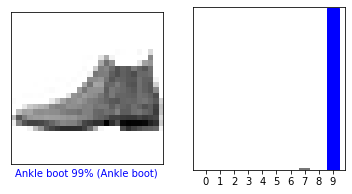

In [232]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

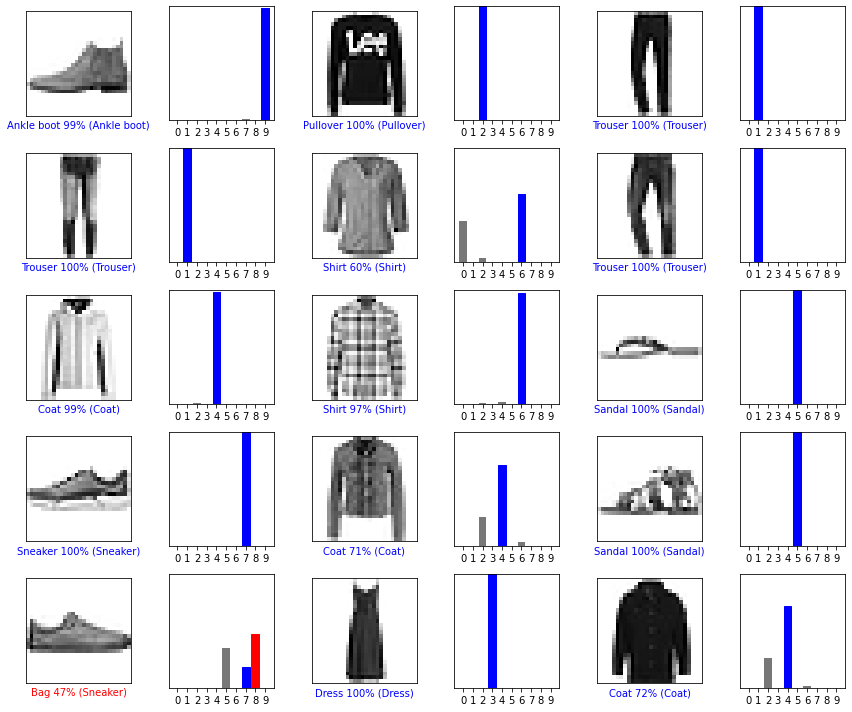

In [233]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [234]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [235]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [236]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.4526736e-05 4.0873256e-13 9.9914348e-01 2.4875740e-11 5.7261216e-04
  3.1840823e-12 2.4942725e-04 2.0162573e-13 3.1151084e-12 2.1764140e-12]]


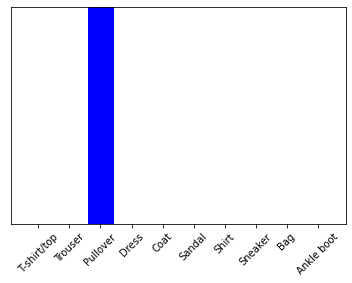

In [237]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [238]:
np.argmax(predictions_single[0])

2

# Load Images 

In [239]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

Download the flowers dataset
This tutorial uses a dataset of several thousand photos of flowers. The flowers dataset contains five sub-directories, one per class:


flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/

In [240]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 3s 0us/step


After downloading (218MB), you should now have a copy of the flower photos available. There are 3,670 total images:

In [241]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [242]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Each directory contains images of that type of flower. Here are some roses:

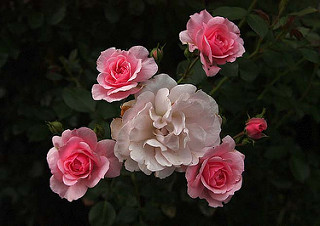

In [243]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

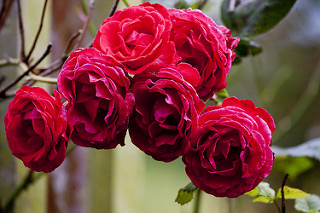

In [244]:
A = PIL.Image.open(str(roses[1]))
A

**Load data using a Keras utility**

Let's load these images off disk using the helpful tf.keras.utils.image_dataset_from_directory utility.

**Create a dataset**
Define some parameters for the loader:

In [245]:
batch_size = 32
img_height = 180
img_width = 180

It's good practice to use a validation split when developing your model. You will use 80% of the images for training and 20% for validation.

In [246]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [247]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.
